<a href="https://colab.research.google.com/github/para18952/cursoPython2025/blob/dia_5/Modulo3_RedesNeuronales/RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/para18952/cursoPython2025.git

Cloning into 'cursoPython2025'...
remote: Enumerating objects: 521, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 521 (delta 24), reused 0 (delta 0), pack-reused 414 (from 2)
Receiving objects: 100% (521/521), 40.81 MiB | 17.92 MiB/s, done.
Resolving deltas: 100% (187/187), done.
Updating files: 100% (169/169), done.


In [4]:
import os
os.chdir("/content/cursoPython2025/Modulo3_RedesNeuronales")

## El problema del sobre Ajuste

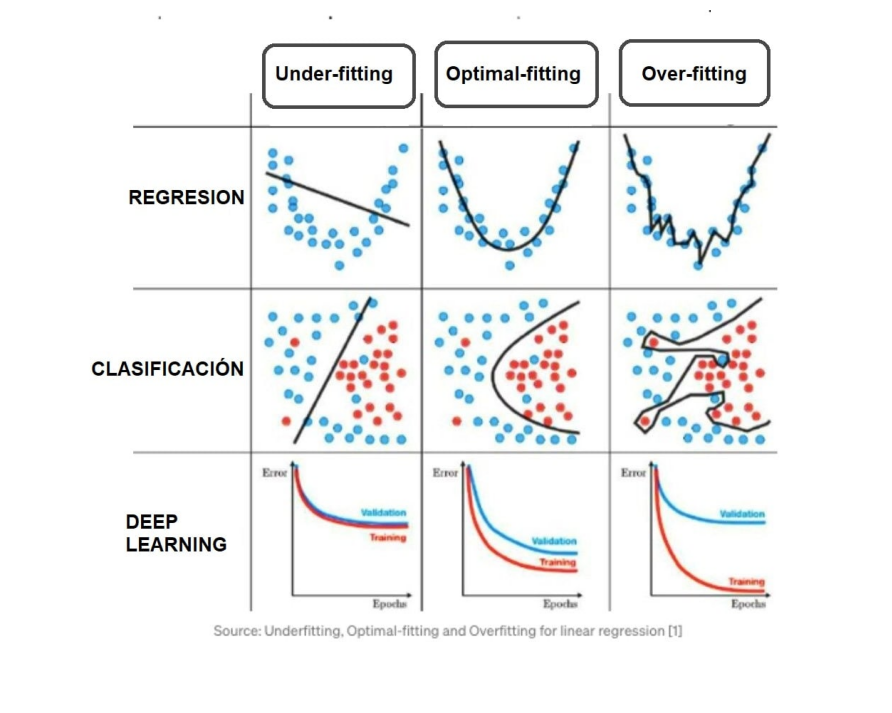

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15, 9))
img = mpimg.imread('Imagenes/Sobre_Ajuste.jpg')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

# Redes Neuronales Artificiales

### Inspriaci√≥n biol√≥gia

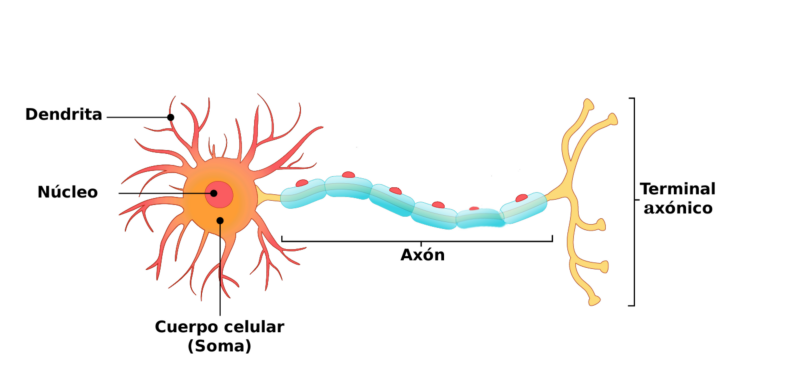

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/NeuronEsquema.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

## Modelo matem√°tico

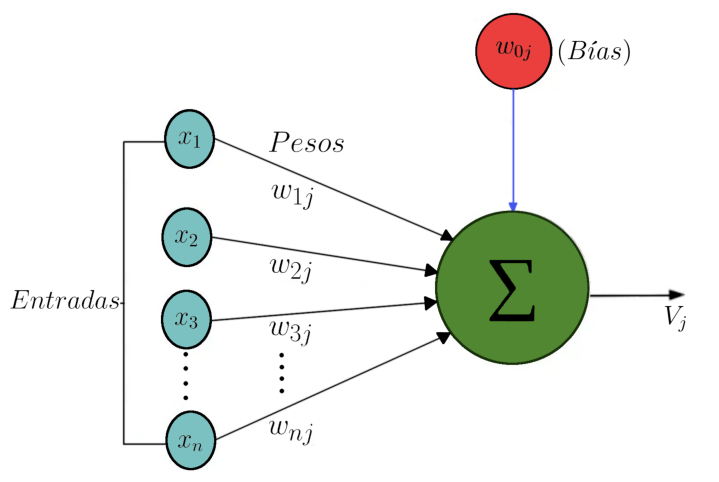

In [7]:
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/ModeloRedNeuronal.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

## Ecuaci√≥n:

$$
y_j = f \left(\sum_{i=0}^n x_i w_{ij}. \right).
$$

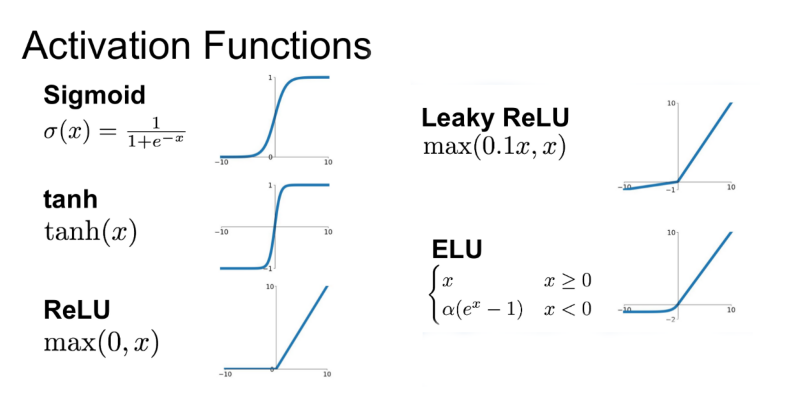

In [8]:
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/ActivationsFunctions.png')
plt.imshow(img)
plt.axis('off')
plt.show()

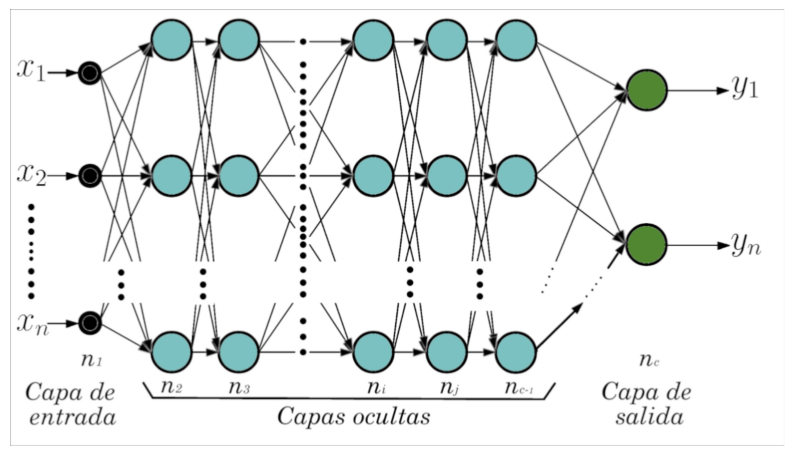

In [ ]:
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/RedMulticapa.png')
plt.imshow(img)
plt.axis('off')
plt.show()



# Preprocesado de datos

    - Datos de entrenamiento
    - Datos de validaci√≥n
    - Datos de prueba

# Entrenamiento de una red feed-forward

### - Topolog√≠a de la red

La topolog√≠a de una red neuronal se refiere a su estructura interna, es decir, c√≥mo est√°n organizadas y conectadas las neuronas en la red. Incluye varios aspectos clave:

1. **N√∫mero de capas:**

    - Capa de entrada: recibe los datos de entrada.

    - Capas ocultas: procesan los datos mediante combinaciones lineales y funciones de activaci√≥n.

    - Capa de salida: entrega el resultado final (por ejemplo, una clase predicha).

2. **N√∫mero de neuronas por capa:**

    - Cuantas m√°s neuronas, m√°s capacidad tiene la red para aprender patrones complejos (aunque tambi√©n aumenta el riesgo de sobreajuste).

3. **Tipo de conexiones:**

En una red recurrente, puede haber retroalimentaci√≥n, es decir, las salidas de una capa pueden volver como entradas a s√≠ mismas u otras capas anteriores.

4. **Funci√≥n de activaci√≥n usada en cada capa:**

Define c√≥mo responde cada neurona ante una entrada. Ejemplos: ReLU, sigmoide, tanh, softmax.


### ¬øPor qu√© importa la topolog√≠a?
Una topolog√≠a demasiado simple puede no captar patrones complejos (Sub-ajuste).

Una topolog√≠a demasiado compleja puede memorizar los datos (Sobre-ajuste).

La elecci√≥n adecuada depende del problema, del tama√±o del dataset, y a veces requiere prueba y error.



#  Inicializaci√≥n de los pesos de la red

La inicializaci√≥n de los pesos en una red neuronal afecta directamente a:

üîÑ La velocidad de convergencia durante el entrenamiento.

üìâ La calidad del resultado final (evitando problemas como gradientes que desaparecen o explotan).

ü§ñ La capacidad de la red para aprender correctamente desde el inicio.


##**Buenas pr√°cticas**

      -Usa He para ReLU o derivadas (LeakyReLU, etc.).

      -Usa Glorot (Xavier) para tanh o sigmoid.

      -Si no est√°s seguro, TensorFlow/Keras aplica autom√°ticamente la
       inicializaci√≥n adecuada seg√∫n la funci√≥n de activaci√≥n.


## Poner todos los pesos en cero o uno: es un **mala pr√°ctica**.

Hace que todas las neuronas en una capa aprendan lo mismo, entonces la red no aprende.


**Para capas convolucionales, estas inicializaciones tambi√©n son v√°lidas.**

**En tensorflow:**

from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal

model.add(Dense(64, activation='relu', **kernel_initializer=HeNormal()**))


### - Actualizaci√≥n de los pesos de la red.

Cada capa tiene un conjunto de pesos y sesgos que se ajustan durante el entrenamiento mediante retropropagaci√≥n y optimizaci√≥n (generalmente con descenso del gradiente).

$$
\Delta w =- \eta \nabla E.
$$

### Ajuste de hiperpar√°metros:

        - B√∫squeda sistem√°tica, o en ingl√©s grid search.
        - B√∫squeda aleatoria.
        - B√∫squeda inteligente

### Sobreaprendizaje

        - Parada temprana


# Ejemplo: vamos a usar una red neuronal para hacer clasificaci√≥n multiclase

En clasificaci√≥n multiclase, se suele usar la funci√≥n **"softmax"** en la capa de salida y la funci√≥n de p√©rdida **"categorical_crossentropy"**.


Una red neuronal b√°sica consta de:
- Capa de entrada
- Capas ocultas
- Capa de salida



Funciones de activaci√≥n comunes:
- ReLU (Rectified Linear Unit)
- Sigmoid
- Tanh

In [9]:
# 1. Importar librer√≠as necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [10]:
# 2. Cargar un dataset con m√°s de dos clases: Wine dataset
from sklearn.datasets import load_wine
data = load_wine()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='class')

In [11]:
# 3. Preprocesamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificamos la variable objetivo a one-hot
y_encoded = to_categorical(y)

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded,
                                                    test_size=0.2, random_state=42, stratify=y)

In [13]:
# 4. Construcci√≥n del modelo con Keras
model = Sequential()
# Agregar capa de entrada
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
# Esto a√±adir√≠a una capa de abandono (dropout), para desactivar neuronas aleatoriamente s√≥lo durante el entrenamiento, para evitar sobreajuste
#model.add(Dropout(0.5))

# Agregar la capa de activaci√≥n
model.add(Dense(10, activation='relu'))

# Agregar la capa de salida
model.add(Dense(3, activation='softmax'))

# Compilar el modelo [le decimos el optimizador de los pesos, la funci√≥n de p√©rdida y la m√©trica a utilizar (en este caso precisi√≥n)]
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# 3 clases




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 16)             ‚îÇ           224 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 10)             ‚îÇ           170 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 3)              ‚îÇ            33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 427 (1.67 KB)

 Trainable params: 427 (1.67 KB)

 Non-trainable params: 0 (0.00 B)

# Antes de continuar, dos cosas importantes:

### Funci√≥n Softmax

**(Usada en model.add(Dense(3, activation='softmax')))**

La funci√≥n *softmax* toma como entrada un vector de valores reales y lo transforma en un vector de probabilidades,
donde cada valor estar√° entre 0 y 1, y la suma total ser√° 1. Se define como:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

Donde:

- $z_i$ es la entrada (logit) para la clase $ i $,
- $K $ es el n√∫mero total de clases,
- La salida representa la probabilidad de que el ejemplo pertenezca a la clase $i$.

**Ejemplo num√©rico**
Sup√≥n que tu red predice el vector:
$$
z=[2.0,1.0,0.1]
$$

Aplicando softmax:
$$
softmax(z)‚âà[0.659,0.242,0.099]
$$
‚Üí Se interpreta como: la red cree que la clase 0 tiene un 65.9% de probabilidad, la clase 1 un 24.2%, etc.

### Funci√≥n de p√©rdida: *Categorical Crossentropy*

La **categorical crossentropy** se utiliza como funci√≥n de p√©rdida para problemas de clasificaci√≥n multiclase. Compara la distribuci√≥n de probabilidades predicha por el modelo con la distribuci√≥n verdadera (que suele ser un *one-hot vector*).

#### F√≥rmula:

$$
\text{CCE}(y, \hat{y}) = -\sum_{i=1}^{K} y_i \cdot \log(\hat{y}_i)
$$

Donde:

- $y $ es el vector real (one-hot),
- $\hat{y} $ es el vector de probabilidades predicho por el modelo (por ejemplo, por una funci√≥n softmax),
- $K $ es el n√∫mero total de clases.

#### Ejemplo:

Supongamos que tenemos 3 clases, y el vector real es:

$$
y = [0,\ 1,\ 0]
$$

y el modelo predice las siguientes probabilidades:

$$
\hat{y} = [0.1,\ 0.7,\ 0.2]
$$

Entonces la *categorical crossentropy* ser√°:

$$
\text{CCE} = - (0 \cdot \log 0.1 + 1 \cdot \log 0.7 + 0 \cdot \log 0.2) = - \log 0.7 \approx 0.357
$$

#### Interpretaci√≥n:

- Cuanto m√°s se acerque la probabilidad predicha a 1 para la clase correcta, menor ser√° la p√©rdida.
- La p√©rdida es mayor cuando la red se "equivoca" y predice baja probabilidad para la clase real.


In [14]:
# 5. Entrenamiento (variable que guarda lo que va pasando en el modelo)
#history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)
# La l√≠nea anterior es lo que ofrec√≠a Gemini, la siguiente la que ha escrito el profesor
history = model.fit(X_train, y_train, epochs=40, batch_size=8, validation_split=0.1, verbose=0)




Precisi√≥n en el conjunto de entrenamiento: 1.0000
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



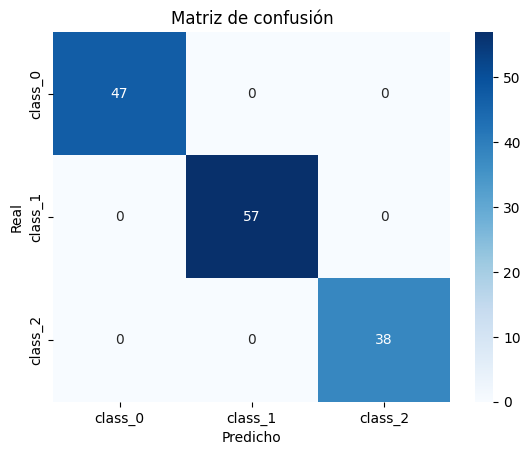

In [15]:
# 6. Evaluaci√≥n en entrenamiento
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"\nPrecisi√≥n en el conjunto de entrenamiento: {acc:.4f}")

# Predicciones y reporte
y_pred_probs = model.predict(X_train)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_train, axis=1)

print("\nReporte de clasificaci√≥n:")
print(classification_report(y_true, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusi√≥n")
plt.show()

In [ ]:
# 6. Evaluaci√≥n en test
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisi√≥n en el conjunto de prueba: {acc:.4f}")

# Predicciones y reporte
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nReporte de clasificaci√≥n:")
print(classification_report(y_true, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusi√≥n")
plt.show()

In [ ]:
# 7. Visualizaci√≥n del entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validaci√≥n')
plt.title('Precisi√≥n durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Precisi√≥n')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validaci√≥n')
plt.title('P√©rdida durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('P√©rdida')
plt.legend()

plt.tight_layout()
plt.show()

### Para hacer una predicci√≥n manual

In [ ]:
import numpy as np

# 1. Nuevo dato crudo (por ejemplo: 13 caracter√≠sticas como en wine dataset)
nuevo_dato_crudo = np.array([[****13 datos***]])

# 2. Escalarlo con el mismo scaler que usaste en el entrenamiento
nuevo_dato_escalado = scaler.transform(nuevo_dato_crudo)

# 3. Hacer la predicci√≥n
probabilidades = model.predict(nuevo_dato_escalado)

# 4. Obtener la clase con mayor probabilidad
clase_predicha = np.argmax(probabilidades)

# 5. Mostrar resultados
print(f"Probabilidades por clase: {probabilidades}")
print(f"Clase predicha: {clase_predicha}")


# Actividad en clase


## Base de datos: Zoo Animal Classification

Tipo: Atributos de animales (patas, pelaje, etc.).

Vamos a entrenar una red para que aprenda a **clasificar** los diferentes animales, deacuerdo a las car√°cter√≠sticas dadas en la base de datos

Caracter√≠sticas importantes:

7 clases de animales:

      - Mam√≠fero

      - Ave

      - Reptil

      - Pez

      - Anfibio

      - Insecto

      - Invertebrado

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Cargar y preparar los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
column_names = [
    'animal_name', 'hair', 'feathers', 'eggs', 'milk',
    'airborne', 'aquatic', 'predator', 'toothed', 'backbone',
    'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'
]

df = pd.read_csv(url, header=None, names=column_names)
df = df.drop('animal_name', axis=1)
print(df['class_type'].value_counts())

class_type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


In [ ]:
# 2. Preprocesamiento
X = df.drop('class_type', axis=1)
y = df['class_type'] - 1  # Convertir clases de 1-7 a 0-6

# El c√≥digo a continuaci√≥n hace lo siguiente:

# Para las columnas num√©ricas (numeric_features):

#          Aplica StandardScaler(), que estandariza los datos (media = 0, desviaci√≥n est√°ndar = 1).
#          Esto es √∫til para algoritmos sensibles a la escala, como redes neuronales.

#          Para la columna categ√≥rica legs (est√° en categorical_features):
#          Aplica OneHotEncoder, que convierte los valores (por ejemplo: 0, 2, 4, 6, 8) en vectores binarios como:
#          legs = 0   ‚Üí [1, 0, 0, 0, 0]
#          legs = 2   ‚Üí [0, 1, 0, 0, 0]


# Identificar columnas para transformaci√≥n
categorical_features = ['legs']
numeric_features = list(set(X.columns) - set(categorical_features))

# Crear transformador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

In [ ]:
# 3. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Convertir etiquetas a one-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=7)

In [ ]:
# 4. Construir modelo de red neuronal


In [ ]:
# 5. Entrenar el modelo


In [ ]:
# 6. Evaluaci√≥n en entrenemiento


# Predicciones y reporte


# Matriz de confusi√≥n



In [ ]:
# 6. Evaluaci√≥n en test


# Predicciones y reporte

# Matriz de confusi√≥n


In [ ]:
# 7. Visualizar rendimiento
plt.figure(figsize=(12, 5))

# Precisi√≥n


# P√©rdida


# 8. Guardar el modelo (opcional)
# model.save('zoo_classifier_model.h5')

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

# Base de datos: HTRU2 ‚Äì Detecci√≥n de pulsars

Descripci√≥n: Incluye datos de candidatos a pulsars (estrellas de neutrones) basados en estad√≠sticas de se√±ales de radio.

Clases: 2 ‚Äî pulsar (minor√≠a) vs ruido (mayor√≠a).

Instancias: 17,898 muestras

Caracter√≠sticas: 8 atributos continuos extra√≠dos de perfiles de pulso y curvas DM

Este dataset es desbalanceado (solo ~9¬†% son pulsars), lo que lo convierte en un desaf√≠o realista. La clasificaci√≥n no ser√° perfecta, lo que es ideal para trabajar con m√©tricas como sensibilidad, precisi√≥n y F1‚Äëscore.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# 1. Cargar dataset

import pandas as pd

# 1. Carga desde OpenML
htru = fetch_openml(data_id=45558, as_frame=True)
df = htru.frame

# 1-2. Renombrar columnas (opcional, para legibilidad)
columnas = [
    "Profile_mean", "Profile_stdev", "Profile_skewness", "Profile_kurtosis",
    "DM_mean",     "DM_stdev",    "DM_skewness",     "DM_kurtosis", "class"
]
df.columns = columnas

# 1-3. Verificar
print(df.shape)          # debe ser (17898, 9)
print(df['class'].value_counts())
df.head()

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values  # 0 = no pulsar, 1 = pulsar

# 2. Preprocesamiento-Estandarizaci√≥n
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_cat = to_categorical(y, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.3, random_state=42, stratify=y)

# 3. Definici√≥n y entrenamiento del modelo


# 4. Evaluaci√≥n


# Un apunte final

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Asumimos que y_train es one-hot y lo convertimos a etiquetas enteras
y_train_labels = np.argmax(y_train, axis=1)

# Convertir la lista de clases en un array de numpy
clases = np.array([0, 1])

# Calcular pesos
cw = class_weight.compute_class_weight(class_weight='balanced',
                                       classes=clases,
                                       y=y_train_labels)
class_weights = {clases[i]: cw[i] for i in range(len(clases))}

print("Pesos de clase:", class_weights)

# Ahora reentrenamos pasando class_weight
model_cw = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')
])
model_cw.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_cw = model_cw.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=0,
    class_weight=class_weights
)







In [ ]:
# 1. Predecir probabilidades y convertir a etiquetas
y_pred_cw_probs = model_cw.predict(X_test)
y_pred_cw = np.argmax(y_pred_cw_probs, axis=1)

# 2. Convertir y_test (one-hot) a etiquetas enteras,
#    Si y_test est√° en formato one-hot:
# y_test_labels = np.argmax(y_test, axis=1)
#    Si y_test es ya un vector de 0/1, usarlo directamente:
y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

# 3. Calcular la matriz de confusi√≥n
cm_cw = confusion_matrix(y_test_labels, y_pred_cw)

# 4. Graficar
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cw,
                              display_labels=['No pulsar', 'Pulsar'])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', colorbar=False)
plt.title("Matriz de Confusi√≥n - Modelo con class_weight")
plt.show()